# The Sparks Foundation [GRIP: Dec, 2022]
## Data Science and Business Analytics Internship
#### **Task 6:** Exploratory Data Analysis - Sports [Level: Advanced]
- **Problem Statement:** Perform EDA on the given 'IPL' dataset as a sports analyst to find out the most successful teams, players and factors contributing to win or lose of a team

#### **Author:** Rohit Rannavre

## Importing the libraries

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the datasets

In [2]:
# loading the first dataset
df1 = pd.read_csv('/content/dataset_6_a.csv')
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# loading the second dataset
df2 = pd.read_csv('/content/dataset_6_b.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Handling the missing values of dataset 1

**Observation:** Data is missing from: city, winner, player_of_match, umpire1, umpire2 and umpire3

In [4]:
# calculating the perentage of missing values in each column
(df1.isnull().sum()/(len(df1))) * 100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

### *Treating the 'city' column*

- Fill the missing values in 'city' by looking at 'venue'

In [5]:
# checking the 'venue' to fill 'city'
df1[df1['city'].isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [6]:
# fill the missing values with 'Dubai'
df1['city'] = df1['city'].fillna('Dubai')

### *Treating the 'winner' column*

- **Observation:** This feature contains a small fraction of missing values

In [7]:
# looking at the missing values
df1[df1['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [8]:
# dropping the mising values
df1.dropna(subset=['winner'], inplace=True)

### *Treating the 'umpire1' & 'umpire2' columns*

In [9]:
# looking at the missing values
df1[(df1.umpire1.isnull()) | (df1.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [10]:
# dropping the missing values
df1.dropna(subset=['umpire1'], inplace=True)
df1.dropna(subset=['umpire2'], inplace=True)

### *Treating the 'umpire3' column*

- **Observation:** This feature will be dropped as it contains almost 85% missing values

In [11]:
# dropping the 'umpire3' feature
df1.drop(columns=['umpire3'], axis=1, inplace=True)

## Handling the missing values of dataset 2

- **Observation:** Data is missing from the columns: player_dismissed, dismissal_kind and fielder

In [12]:
# calculating the perentage of missing values in each column
(df2.isnull().sum()/(len(df2))) * 100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [13]:
# dropping the columns with +90% missing values
df2.drop(columns=['player_dismissed', 'dismissal_kind', 'fielder'], axis=1, inplace=True)

## Merging the Datasets

In [14]:
# merging the datasets
merged = pd.merge(df1, df2, left_on='id', right_on='match_id')
merged.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,2,0,0,0,0,0,2,2


## Exploratory Data Analysis (EDA)

In [15]:
# checking the shape
merged.shape

(178206, 35)

In [16]:
# looking at the columns
merged.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [17]:
# getting the info
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178206 entries, 0 to 178205
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               178206 non-null  int64 
 1   season           178206 non-null  int64 
 2   city             178206 non-null  object
 3   date             178206 non-null  object
 4   team1            178206 non-null  object
 5   team2            178206 non-null  object
 6   toss_winner      178206 non-null  object
 7   toss_decision    178206 non-null  object
 8   result           178206 non-null  object
 9   dl_applied       178206 non-null  int64 
 10  winner           178206 non-null  object
 11  win_by_runs      178206 non-null  int64 
 12  win_by_wickets   178206 non-null  int64 
 13  player_of_match  178206 non-null  object
 14  venue            178206 non-null  object
 15  umpire1          178206 non-null  object
 16  umpire2          178206 non-null  object
 17  match_id  

In [18]:
# getting a statistical summary 
merged.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.00000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000,178206.000000
mean,1790.765283,2013.428729,0.018002,13.448750,3.274710,1790.765283,1.483772,10.165034,3.615484,0.000455,0.036744,0.00491,0.021161,0.004175,0.000056,1.246591,0.067046,1.313637
std,3457.124609,3.360889,0.132957,23.304235,3.349331,3457.124609,0.502113,5.676524,1.806837,0.021315,0.251472,0.11626,0.195186,0.070467,0.016750,1.607804,0.342863,1.604992
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,2011.000000,0.000000,0.000000,0.000000,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,378.000000,2013.000000,0.000000,0.000000,3.000000,378.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,566.000000,2016.000000,0.000000,19.000000,6.000000,566.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.00000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### *Number of matches played in each season*

**Observation:**

- 2013 is the season in which the maximum number of matches were played while the minimum in 2015

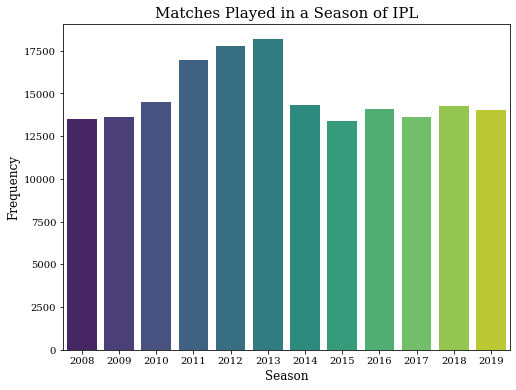

In [19]:
# visualization of games played in each season
plt.figure(figsize=(8,6))
plt.title('Matches Played in a Season of IPL', size=15, family='serif')
sns.countplot(data=merged, x='season', palette='viridis')
plt.xlabel('Season', size=12, family='serif')
plt.ylabel('Frequency', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.show()

### *Participation of teams in each season*

**Observation:**

- 2011 is the only season in which 10 different teams participated while most of the seasons have seen 8 teams

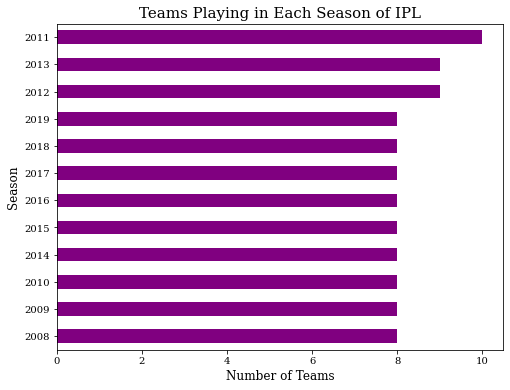

In [20]:
# visualization of the number of teams participating in each season
merged.groupby('season')['team1'].nunique().sort_values(ascending=True).plot.barh(color='purple', figsize=(8,6))
plt.title('Teams Playing in Each Season of IPL', size=15, family='serif')
plt.xlabel('Number of Teams', size=12, family='serif')
plt.ylabel('Season', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.show()

### *Stadiums that have hosted most and least IPL games*

**Observation:**
- In total 36 different stadiums have hosted IPL games 
- Eden Garden tops the list, while ACA-VDCA is with the least number of games 
- Note: some stadiums are repeating in the dataset


In [21]:
# repeating venues
pd.DataFrame(merged.groupby(['city', 'venue']).count()['season'])

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                  1624
Ahmedabad      Sardar Patel Stadium, Motera                          2893
Bangalore      M Chinnaswamy Stadium                                14649
Bengaluru      M Chinnaswamy Stadium                                 1717
               M. Chinnaswamy Stadium                                1480
Bloemfontein   OUTsurance Oval                                        500
Cape Town      Newlands                                              1539
Centurion      SuperSport Park                                       2866
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...    2574
               Punjab Cricket Association Stadium, Mohali            8266
Chennai        M. A. Chidambaram Stadium                             1889
               MA Chidambaram Stadium, Chepauk                      12006
Cuttack        Barabati Stadium                                      1695
Delhi          Feroz Shah Kotla                                     15541
               Feroz Shah Kotla Ground                               1701
Dharamsala     Himachal Pradesh Cricket Association Stadium          2159
Dubai          Dubai International Cricket Stadium                   1700
Durban         Kingsmead                                             3643
East London    Buffalo Park                                           715
Hyderabad      Rajiv Gandhi International Stadium, Uppal            13303
               Rajiv Gandhi Intl. Cricket Stadium                    1912
Indore         Holkar Cricket Stadium                                1965
Jaipur         Sawai Mansingh Stadium                               11158
Johannesburg   New Wanderers Stadium                                 1940
Kanpur         Green Park                                             921
Kimberley      De Beers Diamond Oval                                  726
Kochi          Nehru Stadium                                         1155
Kolkata        Eden Gardens                                         17991
Mohali         IS Bindra Stadium                                     1690
               Punjab Cricket Association IS Bindra Stadium, M...     741
Mumbai         Brabourne Stadium                                     2719
               Dr DY Patil Sports Academy                            3993
               Wankhede Stadium                                     17590
Nagpur         Vidarbha Cricket Association Stadium, Jamtha           742
Port Elizabeth St George's Park                                      1677
Pune           Maharashtra Cricket Association Stadium               5055
               Subrata Roy Sahara Stadium                            4064
Raipur         Shaheed Veer Narayan Singh International Stadium      1431
Rajkot         Saurashtra Cricket Association Stadium                2381
Ranchi         JSCA International Stadium Complex                    1671
Sharjah        Sharjah Cricket Stadium                               1439
Visakhapatnam  ACA-VDCA Stadium                                       239
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    2546

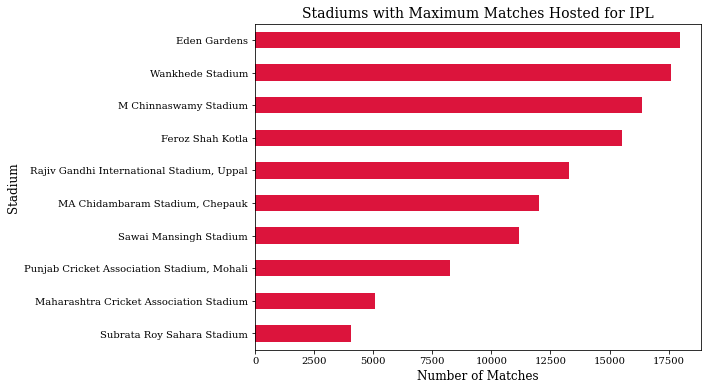

In [22]:
# stadiums that have hosted maximum number of IPL matches
merged['venue'].value_counts().sort_values(ascending=True).tail(10).plot.barh(color='crimson', figsize=(8,6))
plt.title('Stadiums with Maximum Matches Hosted for IPL', size=14, family='serif')
plt.xlabel('Number of Matches', size=12, family='serif')
plt.ylabel('Stadium', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif');

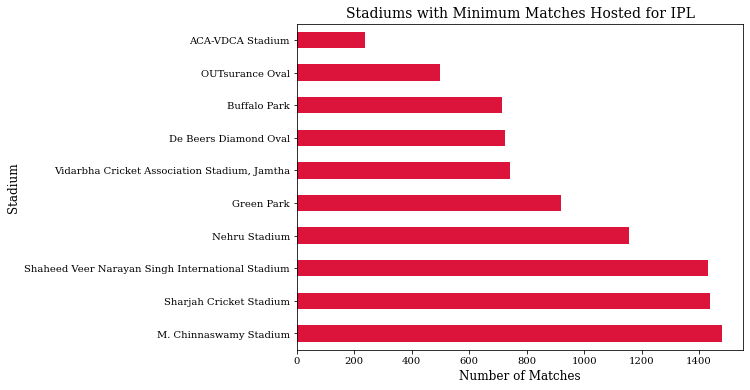

In [23]:
# stadiums that have hosted minimum number of IPL matches
merged['venue'].value_counts().sort_values(ascending=False).tail(10).plot.barh(color='crimson', figsize=(8,6))
plt.title('Stadiums with Minimum Matches Hosted for IPL', size=14, family='serif')
plt.xlabel('Number of Matches', size=12, family='serif')
plt.ylabel('Stadium', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif');

### *Teams winning the toss maximum number of times*

**Observation:**

- Mumbai Indians are the team with the most number of toss wins

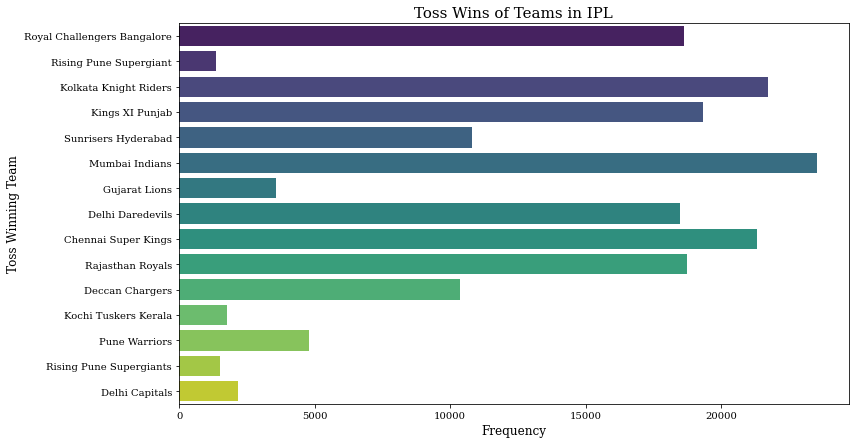

In [24]:
# most toss-winning teams
plt.figure(figsize=(12,7))
sns.countplot(data=merged, y='toss_winner', palette='viridis')
plt.title('Toss Wins of Teams in IPL', size=15, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Frequency', size=12, family='serif')
plt.ylabel('Toss Winning Team', size=12, family='serif')
plt.show()

### *Teams' decision taken after winning the toss*

**Observation:**

- Majority of the teams choose to field first after winning the toss

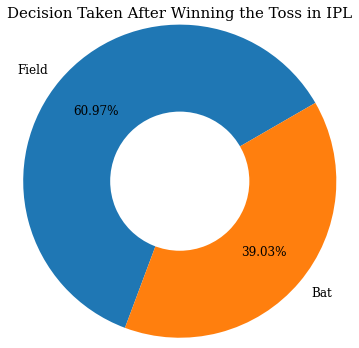

In [25]:
# toss dicision visualization
x = merged['toss_decision'].value_counts(normalize=True).plot.pie(radius=1.8, autopct='%.2f%%', textprops=dict(family='serif', size=12), 
                                                               labels=['Field', 'Bat'], pctdistance=.7, startangle=30)
plt.pie(x=[1], colors=['w'], radius=.8)
plt.title('Decision Taken After Winning the Toss in IPL', size=15, family='serif', pad=55)
plt.ylabel(' ')
plt.show()

### *Decision taken after winning the toss in each season*

**Observation:**

- In most of the seasons, teams have opted to field first

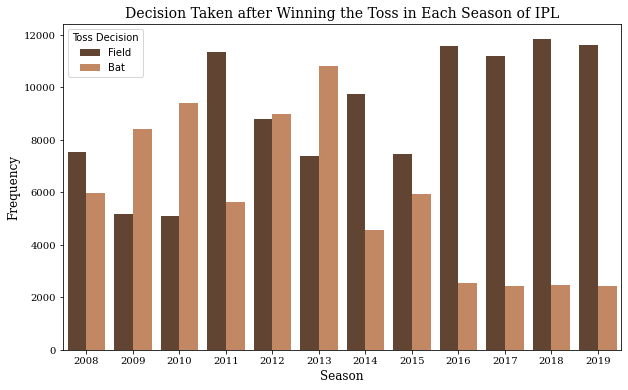

In [26]:
# decision after winning the toss visualization
plt.figure(figsize=(10,6))
sns.countplot(data=merged, x='season', hue='toss_decision', palette='copper')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Season', size=12, family='serif')
plt.ylabel('Frequency', size=12, family='serif')
plt.legend(title='Toss Decision', labels=['Field', 'Bat'])
plt.title('Decision Taken after Winning the Toss in Each Season of IPL', size=14, family='serif')
plt.show()

### *Decision taken after winning the toss by each team*

**Observation:**

- Chennai Super Kings, Deccan Chargers and Pune Warriors are the only teams that have decided to bat first after winning the toss most of the times while the rest have gone against it

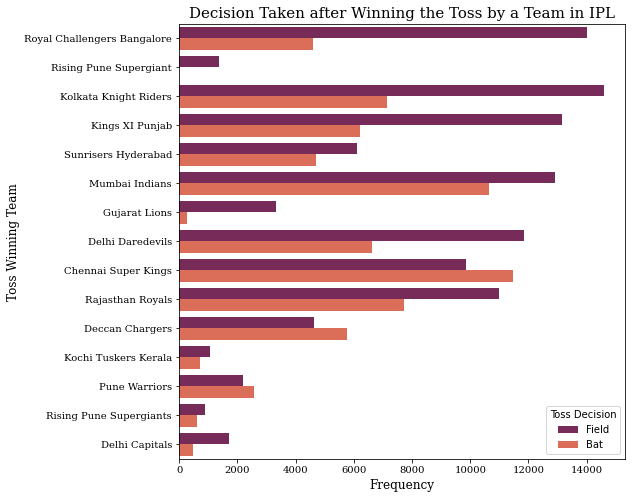

In [27]:
# decision after winning the toss visualization 
plt.figure(figsize=(8,8))
sns.countplot(data=merged, y='toss_winner', hue='toss_decision', palette='rocket')
plt.title('Decision Taken after Winning the Toss by a Team in IPL', size=15, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Frequency', size=12, family='serif')
plt.ylabel('Toss Winning Team', size=12, family='serif')
plt.legend(title='Toss Decision', labels=['Field', 'Bat'])
plt.show()

### *Match winning players*

**Observation:**

- 6 out of the 10 players have opened the innings at least once  
- 6 out of the 10 players are Indians

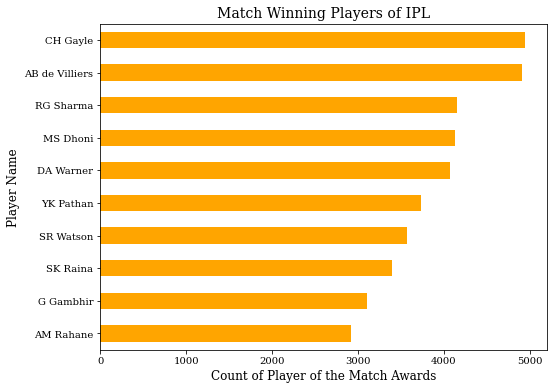

In [28]:
# match winning players
merged['player_of_match'].value_counts().sort_values(ascending=True).tail(10).plot.barh(color='orange', figsize=(8,6))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Count of Player of the Match Awards', size=12, family='serif')
plt.ylabel('Player Name', size=12, family='serif')
plt.title('Match Winning Players of IPL', size=14, family='serif')
plt.show()

### *Runs scored in each season of IPL*

**Observation:**

- In 2013 maximum runs were scored while in 2009 the least

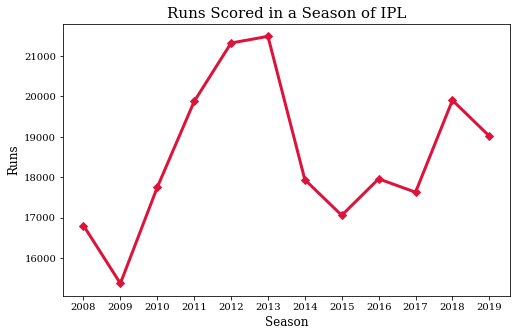

In [29]:
# runs scored visualization
merged.groupby('season')['batsman_runs'].sum().plot.line(color='crimson', linewidth=3, figsize=(8, 5), marker='D')
plt.xticks(df1['season'].unique(), family='serif')
plt.title('Runs Scored in a Season of IPL', size=15, family='serif')
plt.yticks(family='serif')
plt.xlabel('Season', size=12, family='serif')
plt.ylabel('Runs', size=12, family='serif')
plt.show()

### *Highest run getters of IPL*

**Observation:**

- Suresh Raina, Virat Kohli and Rohit Sharma are among the top 3 run getters

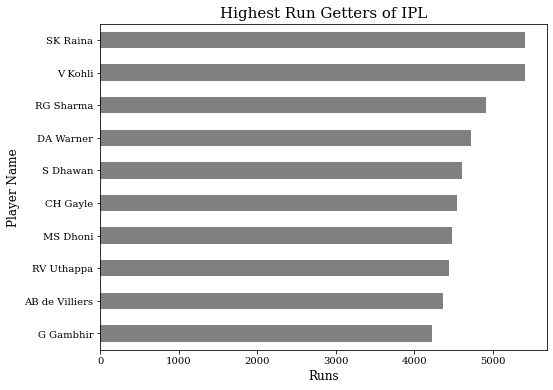

In [30]:
# highest run getters visualization
merged.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=True).tail(10).plot.barh(color='gray', figsize=(8,6))
plt.title('Highest Run Getters of IPL', size=15, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Runs', size=12, family='serif')
plt.ylabel('Player Name', size=12, family='serif')
plt.show()

### *Most successful teams in the history of IPL*

**Observation:**

- Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders are the top 3 most successful teams in IPL

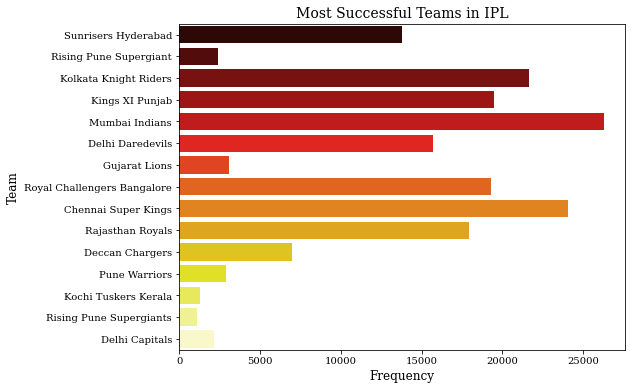

In [31]:
# most successful teams visualization
plt.figure(figsize=(8,6))
sns.countplot(data=merged, y='winner', palette='hot')
plt.xlabel('Frequency', size=12, family='serif')
plt.ylabel('Team', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Most Successful Teams in IPL', size=14, family='serif')
plt.show()

### *Number of bowlers used in each season*

**Observation:**

- In 2013 maximum number of bowlers were used while in 2015 the least

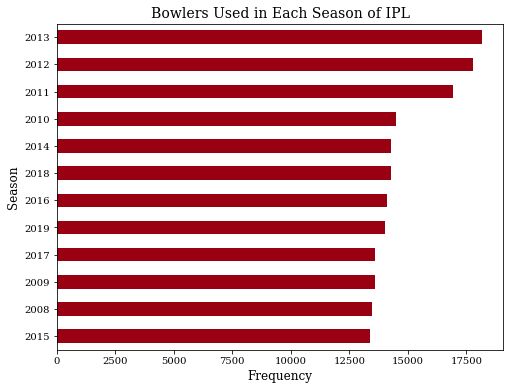

In [32]:
# bowlers used in each season
merged.groupby('season')['bowler'].count().sort_values().plot.barh(color='#990012', figsize=(8,6))
plt.xlabel('Frequency', size=12, family='serif')
plt.ylabel('Season', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Bowlers Used in Each Season of IPL', size=14, family='serif')
plt.show()

### *Results of matches*

**Observation:**

- Almost 99% games have ended up normally 

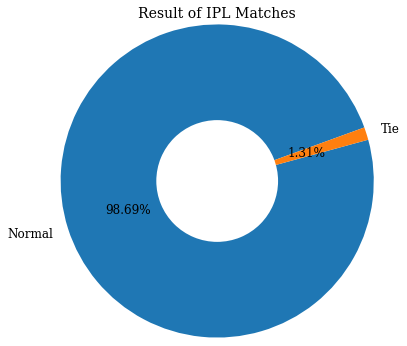

In [33]:
x = merged['result'].str.capitalize().value_counts(normalize=True).plot.pie(autopct='%.2f%%', radius=1.8, 
                                                                            textprops=dict(family='serif', size=12), startangle=20)
plt.pie(x=[1], colors=['w'], radius=.7)
plt.ylabel(' ')
plt.title('Result of IPL Matches', size=14, family='serif', pad=55)
plt.show()